In [1]:
import pandas as pd
# For Graphs
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from __future__ import unicode_literals
# To save model weights and features
import pickle
# models
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
# Dimension reduction
from sklearn.decomposition import PCA
from model_config import *

# Read Training and Testing Data

In [2]:
start_train_set =pd.read_csv(analysis_direction_path_tweets + 'train_test_data/train_set.csv',  lineterminator='\n', error_bad_lines=False)
start_train_set.dropna(inplace=True)
start_test_set  = pd.read_csv(analysis_direction_path_tweets + 'train_test_data/test_set.csv',  lineterminator='\n', error_bad_lines=False)
start_test_set.dropna(inplace=True)

In [3]:
# look how the train set is shuffle
start_train_set.dropna()
print(start_train_set.info())
start_train_set.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12060 entries, 0 to 12059
Data columns (total 2 columns):
class         12060 non-null int64
tweet_text    12060 non-null object
dtypes: int64(1), object(1)
memory usage: 282.7+ KB
None


,class,tweet_text
0,0,استقدمو الصين وزراء ربعنا ماههم كفو
1,0,اكثر ما نستطيع فعله مقاطعه الصين باكبر قدر مم...
2,0,سمعنا_صوتك_ياهادي الحمله حملت سفير الصين علي ...
3,0,اوزيل حتي باشد فتراته سوءا كان يتحفنا بتمريرات...
4,0,لك بان الامريكان اقويا فقد كذب عزيزي قوه الامر...


In [4]:
# look how the test set is shuffle 
start_test_set.dropna()
print(start_test_set.info())
start_test_set.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3014 entries, 0 to 3014
Data columns (total 2 columns):
class         3014 non-null int64
tweet_text    3014 non-null object
dtypes: int64(1), object(1)
memory usage: 70.6+ KB
None


,class,tweet_text
0,1,ربنا احفظك واحميك واغطي واردك سالم غانم وكل اخ...
1,0,الرياض\n الصين تستبدل الالعاب الناريه والليز...
2,1,لو سمعحتوا فعلا الفايرس كورونا ياثر علي المنتج...
3,1,عاجل بكين تعلن حاله وفاه في العاصمه فيروس كو...
4,0,المطلوب التركيز علي ادامه زخم دعوات الانسحاب ا...


# Prepare Data for Features Engineering

In [5]:
tweets_train, target_train, tweets_test, target_test = split_train_test_set(start_train_set, start_test_set)

Number of Training Tweets is:  12060
Number of Tagets class in Training Tweets is:  12060
Number of Testing Tweets is:  3014
Number of Tagets class in Testing Tweets is:  3014


# The whole Data set

In [6]:
df_file = pd.read_csv(analysis_direction_path_tweets + 'train_test_data/last_classifed_tweets_to_model_on_over_15000_tweets.csv', lineterminator='\n', error_bad_lines=False)
df_file.dropna(inplace=True)
print(len(df_file))
print("The number of class 1 which represent this tweet talks about coronavirus: ", len(df_file[df_file['class'] == 1]))
print("The number of class 0 which represent this tweet not talks about coronavirus: ", len(df_file[df_file['class'] == 0]))
df_file.head()

15075
The number of class 1 which represent this tweet talks about coronavirus:  7267
The number of class 0 which represent this tweet not talks about coronavirus:  7808


,class,tweet_text
0,1,طب مسلمين الصين اللي بيموتو الفيرس ذنب برده ا...
1,1,علي ما اذكر معظم الفيروسات ما عدا الايبولا ك...
2,1,اميركا السبب لضرب الاقتصاد الصيني وتركيع الصين...
3,1,قلنا نقاطع الصين الناس قالت مش ممكن الان مق...
4,1,نصحيتين اقدمها لك 1 لا تتروش في البرد 2 اح...


# Features Engineering

In [7]:
text_list = list(df_file['tweet_text'])
text_list = [i.split() for i in text_list] # split each review to list of words
print("The firt 5 reviews are: ", text_list[:3])


number_of_features = 300
window_size = 7
min_words_count = 1

The firt 5 reviews are:  [['طب', 'مسلمين', 'الصين', 'اللي', 'بيموتو', 'الفيرس', 'ذنب', 'برده', 'الوباء', 'مبيفرقش', 'تقي'], ['علي', 'ما', 'اذكر', 'معظم', 'الفيروسات', 'ما', 'عدا', 'الايبولا', 'كلها', 'مصدرها', 'الصين'], ['اميركا', 'السبب', 'لضرب', 'الاقتصاد', 'الصيني', 'وتركيع', 'الصين', 'بعتت', 'فيروس']]


In [8]:
def word_to_vec(text_list, number_of_features, window_size, min_words_count):
    '''
    Argument:
        list of strings and each string is list of words
        size = extract 50 features for each word
        window = 7 take the context of neighbour words
        min_count = 1 consider each word that even repeated 1 time
    return:
        the word2vec model
    '''
    word_to_vec_model = Word2Vec(text_list, size =number_of_features, window = window_size, min_count=min_words_count, sg = 1) 
    print("Our word2vec model: ", word_to_vec_model)
    print("The number of frequent words of our data: ", len(word_to_vec_model.wv.vocab)) # the frequent words
    # save model
    word_to_vec_model.save('models_weights/word2vec/word2vec_features.bin')

    # load model
    word_to_vec_model = Word2Vec.load('models_weights/word2vec/word2vec_features.bin')
    return word_to_vec_model

In [9]:
word_to_vec_model = word_to_vec(text_list, number_of_features, window_size, min_words_count)

Our word2vec model:  Word2Vec(vocab=57484, size=300, alpha=0.025)
The number of frequent words of our data:  57484


In [10]:
print("Feature of some words\n", word_to_vec_model['ممتاز'][:50]) # first 50 features

Feature of some words
 [ 0.07159312  0.12956184  0.07943423 -0.13488112 -0.0868281  -0.05562469
  0.0411917  -0.0033188   0.02448485 -0.08941628  0.05145119  0.16429023
 -0.1935044   0.19402558 -0.15221992  0.03427834 -0.06343645 -0.17944591
  0.00603614 -0.08315802 -0.03159866 -0.07149523 -0.01849223  0.22835502
 -0.03646809  0.0013304  -0.05068896 -0.01821022 -0.10213733 -0.2083903
  0.04098757 -0.01908511  0.0990761  -0.02304327 -0.0463382  -0.24118362
 -0.02687977  0.00984727 -0.03448062 -0.06105231 -0.00097546 -0.13894783
  0.06882231 -0.04954067 -0.1485882   0.06883712  0.03336613 -0.08112241
  0.02900468  0.03563498]


/home/abdelrahman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [11]:
word_to_vec_model.most_similar('كورونا')

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('كورونا_الجديد', 0.8745729923248291),
 ('الجديد', 0.8651182651519775),
 ('فيروس_كورونا', 0.8538630604743958),
 ('مخاوف', 0.845136284828186),
 ('القاتل', 0.8410530090332031),
 ('عالمي', 0.8361520767211914),
 ('حدودها', 0.8341037034988403),
 ('تاثير', 0.8300197720527649),
 ('غامض', 0.8267508149147034),
 ('لمنع', 0.8252075910568237)]

In [12]:
word_to_vec_model.most_similar('فيروس')

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('الفيروس', 0.8730694055557251),
 ('لفيروس', 0.8620957136154175),
 ('فايروس', 0.8611817359924316),
 ('الجديد', 0.856784462928772),
 ('بحزم', 0.8457692265510559),
 ('توقيع', 0.8427802324295044),
 ('الرءيس', 0.8423230051994324),
 ('القاتل', 0.8409960269927979),
 ('العالمي', 0.8377662897109985),
 ('الاتفاق', 0.835684061050415)]

/home/abdelrahman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


The shape of our word_features is: (300, 300)


/home/abdelrahman/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/abdelrahman/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


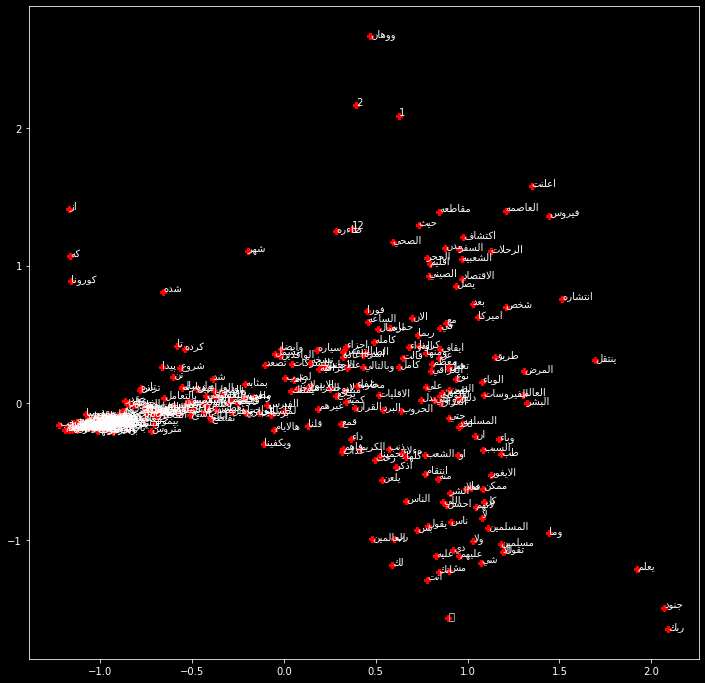

In [17]:
 # retrieve frequent words
words = list(word_to_vec_model.wv.vocab)

# I took just 100 words to present with PCA
words = words[:300]

# get the features of those 100 word
word_features = word_to_vec_model[words] 

# it will be 100 word * 50 which 50 feature of each word
print("The shape of our word_features is:", word_features.shape)

# Dimension reduction to display so instead of 50 dimension of each word 
#reduce to 2 dimensional that have fine display
# from 50 features to just 2 features for displaying how words related words to gether
pca = PCA(n_components=2)

# fit the model
xy_words = pca.fit_transform(word_features)

# set the visualization plot
plt.style.use(['dark_background'])
plt.figure(figsize=(12,12))

# after reduction for all features in first column as x and all features from second column as y
plt.scatter(xy_words[:, 0], xy_words[:, 1], marker='P',s=30, c="red") 

for i, word in enumerate(words):
    # handle Arabic words to display from right to left and as complete word not just separate chars
    word = arabic_reshaper.reshape(word) # handle arabic words on ploting
    word = get_display(word)
    # plot each word beside its point
    plt.annotate(word, xy=(xy_words[i, 0], xy_words[i, 1]))
plt.show()

In [20]:
max_len_str = max([len(tweet) for tweet in text_list])
print(max_len_str)

63


In [22]:
tweets_train = list(tweets_train)
tweets_test = list(tweets_test)

# Before
print(tweets_train[:3])
print(tweets_test[:3])

tweets_train_splited = [tweet.split() for tweet in tweets_train] 
tweets_test_splited = [tweet.split() for tweet in tweets_test] 

# After
print(tweets_train_splited[:3])
print(tweets_test_splited[:3])

['استقدمو الصين وزراء ربعنا ماههم كفو', ' اكثر ما نستطيع فعله مقاطعه الصين باكبر قدر ممكن والتحريض علي المقاطعه افراد وشركات لعلها تتطور لحكومات   ', ' سمعنا_صوتك_ياهادي الحمله حملت سفير الصين علي الذهاب ابن منصور يتفاقده عاده موجود ويبدو لقي الضاءعه حقنا بالله خرجوه ولو بكيس قمامه وبعدين نتفاهم ههههههه   ']
['ربنا احفظك واحميك واغطي واردك سالم غانم وكل اخوانا الفي الصين   لاينسانا ولا ينساكم   اعمل حسابك   شا الله متلمي علي شباب سودانين', ' الرياض\n  الصين تستبدل الالعاب الناريه والليزر بطاءرات الدروز للاحتفال براس السنه لاول مره \n  تطور مذهل ربما ينهي عصر الالعاب الناريه  ', 'لو سمعحتوا فعلا الفايرس كورونا ياثر علي المنتجات        توني طالبه منكم وقالوا لاحد يطلب عشان الفايرس اللي بالصين  ']
[['استقدمو', 'الصين', 'وزراء', 'ربعنا', 'ماههم', 'كفو'], ['اكثر', 'ما', 'نستطيع', 'فعله', 'مقاطعه', 'الصين', 'باكبر', 'قدر', 'ممكن', 'والتحريض', 'علي', 'المقاطعه', 'افراد', 'وشركات', 'لعلها', 'تتطور', 'لحكومات'], ['سمعنا_صوتك_ياهادي', 'الحمله', 'حملت', 'سفير', 'الصين', 'علي', 'الذهاب', 'ابن', 'م

In [23]:
train_embedding_matrix = word_2_vec_matrix(tweets_train_splited, word_to_vec_model, number_of_features, max_len_str)

The shape of matrix (12060, 18900)


/home/abdelrahman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [24]:
print(train_embedding_matrix.shape)

(12060, 18900)


In [25]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.linspace(.01, 2, 5),
    'solver' : ['liblinear'],
    'multi_class': ['ovr'],
    'max_iter': [100, 1000]},
    
]
model1 = LogisticRegression()
logreg_model_search1 = grid_search(model1, param_grid, train_embedding_matrix, target_train)


In [26]:
check_search_params(logreg_model_search1)

0.669485903814262 {'C': 0.01, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8158374792703151 {'C': 0.01, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.6696517412935323 {'C': 0.01, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8158374792703151 {'C': 0.01, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.846849087893864 {'C': 0.5075, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8546434494195688 {'C': 0.5075, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.8466832504145938 {'C': 0.5075, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8546434494195688 {'C': 0.5075, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.8534825870646767 {'C': 1.005, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

True

In [27]:
logreg_model_search1.best_estimator_

LogisticRegression(C=2.0, multi_class='ovr', penalty='l1', solver='liblinear')

In [28]:
test_embedding_matrix = word_2_vec_matrix(tweets_test_splited, word_to_vec_model, number_of_features, max_len_str)

The shape of matrix (3014, 18900)


/home/abdelrahman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [29]:
logreg_model = LogisticRegression(C=2.0, multi_class='ovr', penalty='l1', solver='liblinear')
logreg_model.fit(train_embedding_matrix, target_train)

model_predict_train__test_data(logreg_model, train_embedding_matrix, target_train,
                              test_embedding_matrix, target_test)

===================== Training Result =====================
F1 score of our training data is:  0.9018242122719735
Evalution Matrix of training data is 
 [[5931  315]
 [ 869 4945]]
===================== Testing Result =====================
F1 score of our Testing data is:  0.8629727936297278
Evalution Matrix of Testing data is 
 [[1438  123]
 [ 290 1163]]


True

In [30]:
pickle.dump(logreg_model, open('models_weights/logistic_regression/word2vec_LogisticRegression_90tr_86ts.sav', 'wb'))

In [31]:
param_grid = [
    {'penalty' : ['l1'],
    'C' : np.linspace(2, 4, 5),
    'solver' : ['liblinear'],
    'multi_class': ['ovr'],
    'max_iter': [1000]},
    
]
model2 = LogisticRegression()
logreg_model_search2 = grid_search(model2, param_grid, train_embedding_matrix, target_train)


In [32]:
logreg_model_search1.best_estimator_

LogisticRegression(C=2.0, multi_class='ovr', penalty='l1', solver='liblinear')

In [33]:
check_search_params(logreg_model_search1)

0.669485903814262 {'C': 0.01, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8158374792703151 {'C': 0.01, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.6696517412935323 {'C': 0.01, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8158374792703151 {'C': 0.01, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.846849087893864 {'C': 0.5075, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8546434494195688 {'C': 0.5075, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.8466832504145938 {'C': 0.5075, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8546434494195688 {'C': 0.5075, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.8534825870646767 {'C': 1.005, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

True

In [34]:
logreg_model2 = LogisticRegression(C=2.0, multi_class='ovr', penalty='l1', solver='liblinear')
logreg_model2.fit(train_embedding_matrix, target_train)

model_predict_train__test_data(logreg_model2, train_embedding_matrix, target_train,
                              test_embedding_matrix, target_test)

===================== Training Result =====================
F1 score of our training data is:  0.9016583747927032
Evalution Matrix of training data is 
 [[5930  316]
 [ 870 4944]]
===================== Testing Result =====================
F1 score of our Testing data is:  0.8636363636363636
Evalution Matrix of Testing data is 
 [[1440  121]
 [ 290 1163]]


True